# **Implementing of LDA in Python with Scikit-Learn**

### **1.What is Discriminant Analysis?**

Discriminant analysis is statistical technique used to classify observations into non-overlapping groups, based on scores on one or more quantitative predictor variables.

For example, a doctor could perform a discriminant analysis to identify patients at high or low risk for stroke. The analysis might classify patients into high- or low-risk groups, based on personal attributes (e.g., chololesterol level, body mass) and/or lifestyle behaviors (e.g., minutes of exercise per week, packs of cigarettes per day).

### **2. Dimensionality Reduction.**

Dimensionality reduction technique reduces the number of dimensions (i.e. variables) in a dataset while retaining as much information as possible.

The main goal of dimensionality reduction techinques is to reduce the dimensions by removing the reduntant and dependent features by transforming the features from higher dimensional space to a space with lower dimensions.

### **3.What is Linear Discriminant Analysis?**

Linear Discriminant Analysis / Normal Discriminant Analysis / Discriminant Function Analysis
LDA is the most commonly used dimensionality reduction technique in supervised learning.

Basically, it is a preprocessing step for pattern classification and machine learning applications.

The goal of Linear Discriminant Analysis is to project the features in higher dimension space onto a lower dimensional space.

### **4.How does LDA works?**

The general LDA approach is very similar to a Principal Component Analysis but in addition to finding the component axes that maximize the variance of our data (PCA), we are additionally interested in the axes that maximize the separation between multiple classes (LDA).

Example

Let's say we have to reduce a 2D plot into a 1D plot.

Don't go for the complexity(what is gene x and y)....consider it as only x and y axis.

Reducing2Dto1D

If we plot it considering any one axis such as x-axis. Then there may be some overlapping points which will not distribute the groups perfectly as shown in the figure below.

Reduction_on_x_axis

Same will be the case if we plot the points considering only y-axis.

Here,comes LDA which help us in proper distribution of the groups.

LDA uses both the axes (X and Y) to create a new axis and projects data onto a new axis in a way to maximize the separation of the two categories and hence, reducing the 2D graph into a 1D graph.

Reducing_usingLDA

Two criteria are used by LDA to create a new axis:

 1.Maximize the distance between means of the two classes.

 2.Minimize the variation within each class.

LDA_method

In the above graph, it can be seen that a new axis is generated and plotted in the 2D graph such that it maximizes the distance between the means of the two classes and minimizes the variation within each class.

After generating this new axis using the above-mentioned criteria, all the data points of the classes are plotted on this new axis and are shown in the figure given below.

Reduced_data_points

Note: Linear Discriminant Analysis fails when the mean of the distributions are shared, as it becomes impossible for LDA to find a new axis that makes both the classes linearly separable. In such cases, we use non-linear discriminant analysis.

In [1]:
# import the required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data = sns.load_dataset("iris")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Checking for Missing Values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Thre is no any missing values**

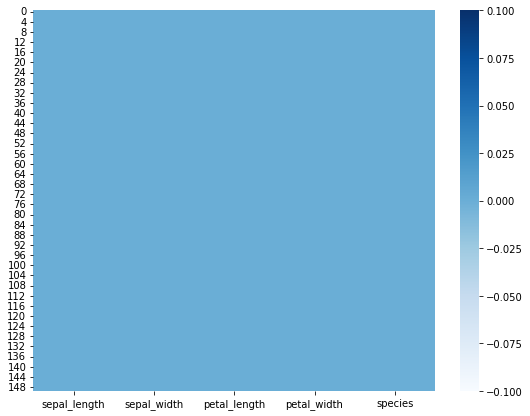

In [8]:
plt.figure(figsize=(9,7))
sns.heatmap(data.isnull(),cmap = "Blues")
plt.show()

### **EDA**

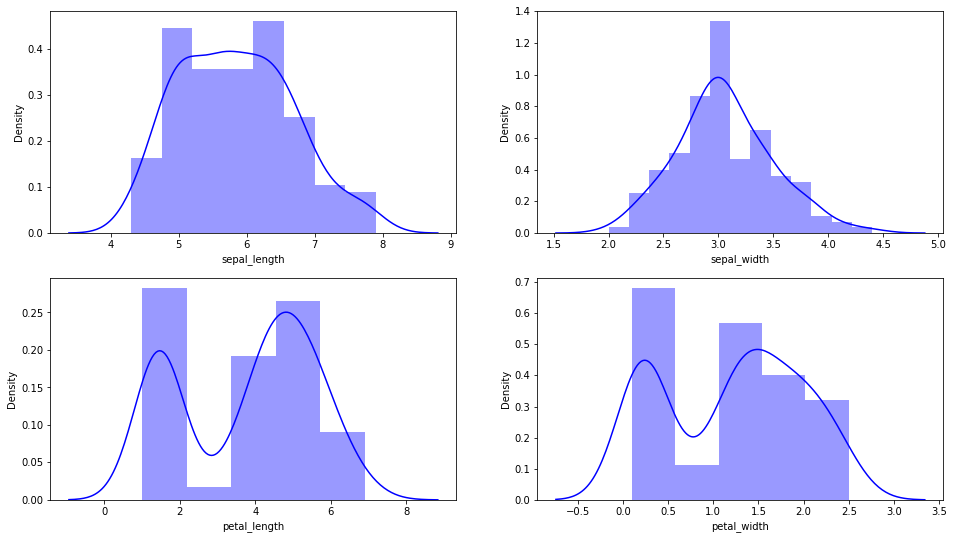

In [9]:
plt.figure(figsize=(16,9))
plotnumber=1

for column in data.iloc[:,:-1]:
  if plotnumber<=5:
    ax = plt.subplot(2,2,plotnumber)
    sns.distplot(data[column],color = "Blue")
    plt.xlabel(column)
  plotnumber+=1
plt.show()

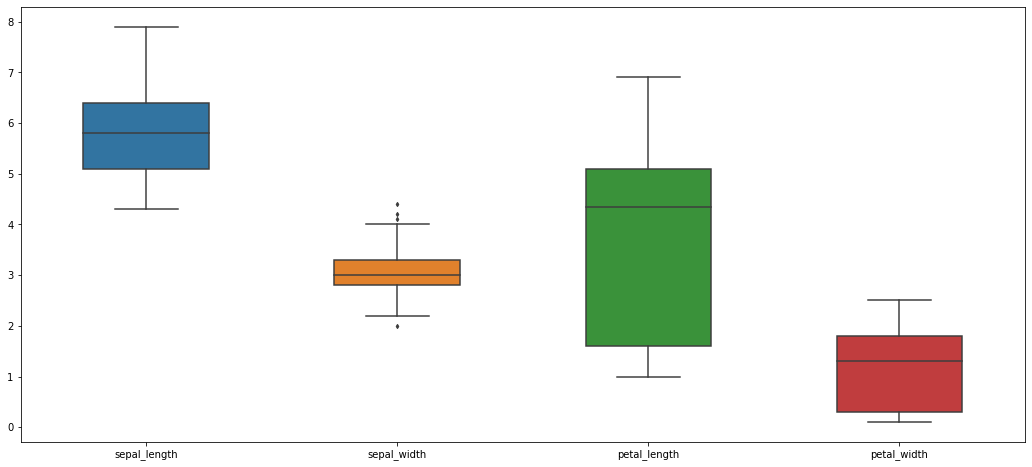

In [10]:
fig,ax = plt.subplots(figsize = (18,8))
sns.boxplot(data=data,width = 0.5,fliersize = 3,ax=ax)
plt.show()

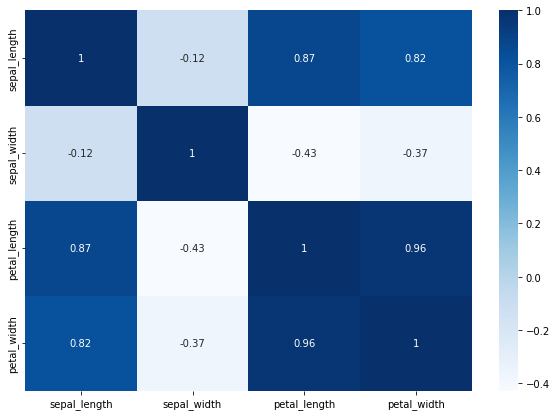

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),cmap = "Blues",annot = True)
plt.show()

In [12]:
data["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

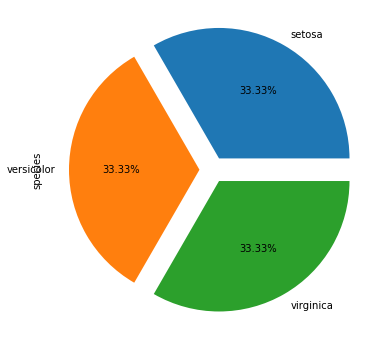

In [13]:
plt.figure(figsize=(6,6))
explode = [0.1,0.1,0.1]
data["species"].value_counts().plot(kind = "pie",autopct = "%0.2f%%",explode=explode)
plt.show()

**Separate Independent Feature and Dependent Feature**

In [14]:
X = data.drop(columns = ["species"],axis=1)
y = data["species"]

In [15]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

**Feature Scaling**

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [19]:
type(X_scaled)

numpy.ndarray

<AxesSubplot:>

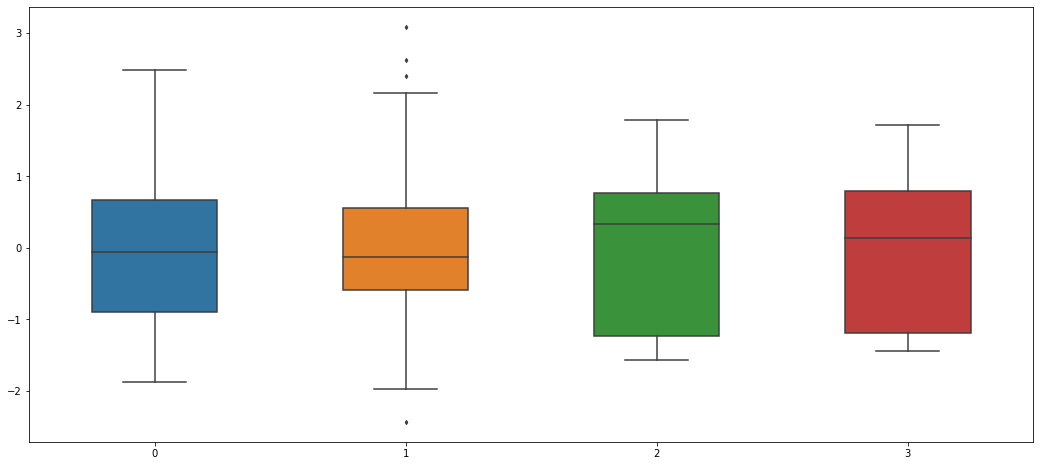

In [20]:
fig,ax = plt.subplots(figsize = (18,8))
sns.boxplot(data=X_scaled,width = 0.5,fliersize = 3,ax=ax)

In [21]:
X_scaled_DataFrame = pd.DataFrame(X_scaled)
X_scaled_DataFrame

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


**VIF**

In [22]:
variables = X_scaled

vif = pd.DataFrame()
vif["Vif"] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif["Feature"] = X.columns
vif

,Vif,Feature
0,7.072722,sepal_length
1,2.100872,sepal_width
2,31.261498,petal_length
3,16.090175,petal_width


**Except Sepal_width all are highly Multi-Correlated**

### **Splitting the data for Training and Trsting** 

In [23]:
#split the data into training and testing

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state = 10)

In [24]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (120, 4)
Shape of X Test:  (30, 4)
Shape of y Train:  (120,)
Shape of y Test:  (30,)


### **LDA**

In [25]:
# Performing LDA

lda = LDA()  ## here we are not passing Number of Components
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [26]:
explained_variance = lda.explained_variance_ratio_ #returns the variance caused by each coomponent.
explained_variance

array([0.99190792, 0.00809208])

Note: Notice that we got the ratios for only 2 features..why..??

It's because the third and fourth value is 0, and hence not shown in the variance ratio.

It can be seen that first component is responsible for 99.27% variance. Similarly, the second component causes 0.7% variance in the dataset. Collectively we can say that the classification information contained in the feature set is captured by the first two components.

In [27]:
# Performing LDA

lda = LDA(n_components=1) ## Passing number of components = 1
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [28]:
explained_variance = lda.explained_variance_ratio_ #returns the variance caused by each coomponent.
explained_variance

array([0.99190792])

### **Implementing Model and find Model Proformance**

In [29]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [30]:
y_pred = clf.predict(X_test)
y_pred

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica'],
      dtype=object)

In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]


In [32]:
print(round(accuracy_score(y_test, y_pred)*100,3),"%")

96.667 %


### **6. Extensions to LDA.**
• Quadratic Discriminant Analysis (QDA): Each class uses its own estimate of variance (or covariance when there are multiple input variables).

• Flexible Discriminant Analysis (FDA): Where non-linear combinations of inputs is used such as splines.

• Regularized Discriminant Analysis (RDA): Introduces regularization into the estimate of the variance (actually covariance), moderating the influence of different variables on LDA.

### **7.Applications of LDA.**
• For customer's buying pattern recognition: LDA helps here to identify and choose the parameters to describe the components of a group of customers who are highly likely to buy similar products.

• For facial recognition: it is the most famous application in the field of computer vision, every face is drawn with a large number of pixel values, LDA reduces the number of features to a more controllable number first before implementing the classification task. A temple is created with newly produced dimensions which are a linear combination of pixel values.

• In medical: LDA is used here to classify the state of patients’ diseases as mild, moderate or severe based on the various parameters and the medical treatment the patient is going through in order to decrease the movement of treatment.

• For predictions: LDA is firmly used for prediction and hence in decision making, “will you read a book” gives you a predicted result through one or two possible class as a reading book or not.

• In learning: Nowadays, robots are trained to learn and talk to work as human beings, this can be treated as classification problems. LDA makes similar groups based on various parameters such as frequencies, pitches, sounds, tunes, etc.

### **8. More about LDA.**
Watch this video: https://www.youtube.com/watch?v=azXCzI57Yfc